## Bollinger Bands

Bollinger Bands는 1980년대 초 존 볼린저(John Bollinger)에 의해 개발된 기술적 분석 도구로, 주식, 외환, 상품 등 다양한 금융 자산의 가격 변동성을 측정하고 추세를 식별하는 데 사용된다. 이 도구는 이동 평균과 가격의 표준 편차를 기반으로 한 상단 밴드와 하단 밴드로 구성된다.

Bollinger Bands의 구성은 다음과 같다:

- **중심선 (Middle Band)** : 일반적으로 20일 이동 평균이 사용되며, 이는 기준선 역할을 한다.
- **상단 밴드 (Upper Band)** : 중심선에서 일정 표준 편차(보통 2 표준 편차) 만큼 위에 위치한다.
- **하단 밴드 (Lower Band)** : 중심선에서 일정 표준 편차(보통 2 표준 편차) 만큼 아래에 위치한다.

이 세 개의 밴드는 자산의 가격이 일반적으로 어디에 위치하는지, 그리고 가격이 얼마나 변동성이 높은지를 시각적으로 나타낸다. 가격이 상단 밴드에 접근하면 '과매수' 상태로 간주될 수 있으며, 이는 가격 하락의 가능성을 나타낸다. 반대로, 가격이 하단 밴드에 접근하면 '과매도' 상태로 간주되며, 이는 가격 상승의 가능성을 나타낸다.

Bollinger Bands의 폭도 중요한 정보를 제공한다. 밴드의 폭이 넓어지면, 이는 시장의 변동성이 증가하고 있음을 의미하며, 밴드의 폭이 좁아지면 시장의 변동성이 감소하고 있음을 의미한다. 이러한 변동성의 변화는 시장의 가능한 추세 변화를 예고할 수 있으며, 투자자와 트레이더들은 이 정보를 사용하여 거래 전략을 조정할 수 있다.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from ta.volatility import bollinger_hband, bollinger_lband, bollinger_mavg, bollinger_pband, bollinger_wband, bollinger_hband_indicator, bollinger_lband_indicator
import yfinance as yf

import warnings
warnings.filterwarnings('ignore')

start_date = '2023-01-01'
end_date = '2024-04-14'
ticker = '^GSPC'
data = yf.download(ticker, start = start_date, end = end_date)

[*********************100%%**********************]  1 of 1 completed


### Simple Bollinger Band

기간별 이동평균 표준편차를 상,하단 밴드로 사용한다. `ta` 라이브러리에서 함수로 간단히 구현이 가능하다.

In [2]:
hband = bollinger_hband(
    close = data['Close'],
    window = 20,
    window_dev = 2,
    fillna = False
)

lband = bollinger_lband(
    close = data['Close'],
    window = 20,
    window_dev = 2,
    fillna = False
)

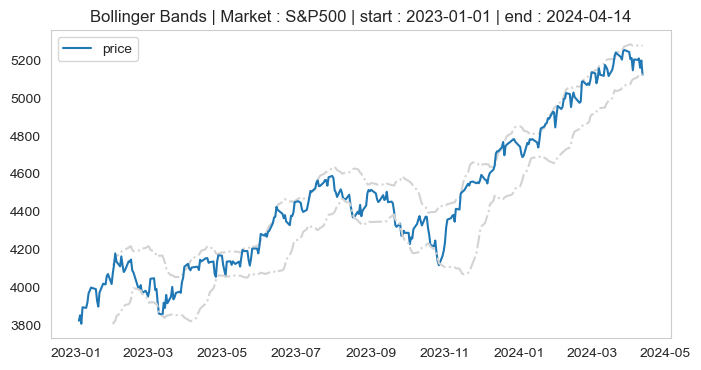

In [18]:
plt.figure(figsize = (8, 4))
plt.plot(hband, color = 'lightgray', ls = '-.')
plt.plot(data['Close'], label = 'price')
plt.plot(lband, color = 'lightgray', ls = '-.')
plt.legend()
plt.grid(False)
plt.title(f'Bollinger Bands | Market : S&P500 | start : {start_date} | end : {end_date}')
plt.show()

### Bollinger bands indicator

indicator는 매수 매도 시점을 계산해주는 함수이다.

In [21]:
hband_indicator = bollinger_hband_indicator(
    close = data['Close'],
    window = 20,
    window_dev = 2,
    fillna = False
)

lband_indicator = bollinger_lband_indicator(
    close = data['Close'],
    window = 20,
    window_dev = 2,
    fillna = False
)

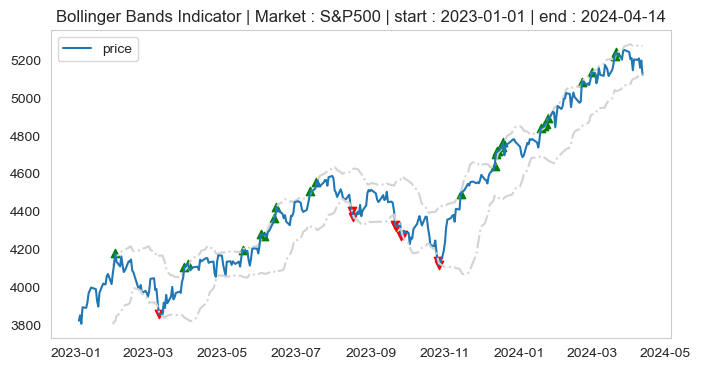

In [22]:
plt.figure(figsize = (8, 4))
plt.plot(hband, color = 'lightgray', ls = '-.')
plt.scatter(
    hband_indicator[hband_indicator == 1].index,
    data['Close'].loc[hband_indicator[hband_indicator == 1].index],
    color = 'green',
    marker = '^'
)
plt.plot(data['Close'], label = 'price')
plt.plot(lband, color = 'lightgray', ls = '-.')
plt.scatter(
    lband_indicator[lband_indicator == 1].index,
    data['Close'].loc[lband_indicator[lband_indicator == 1].index],
    color = 'red',
    marker = 'v'
)
plt.legend()
plt.grid(False)
plt.title(f'Bollinger Bands Indicator | Market : S&P500 | start : {start_date} | end : {end_date}')
plt.show()

### Bollinger MAVG

특정 기간동안의 이동평균선이다. 균형선이라고 하며 indicator에서 뜬 신호가 이 선에 도달할 경우 반대 포지션으로 청산하는게 일반적이다

In [23]:
mavg = bollinger_mavg(
    close = data['Close'],
    window = 20,
    fillna = False
)

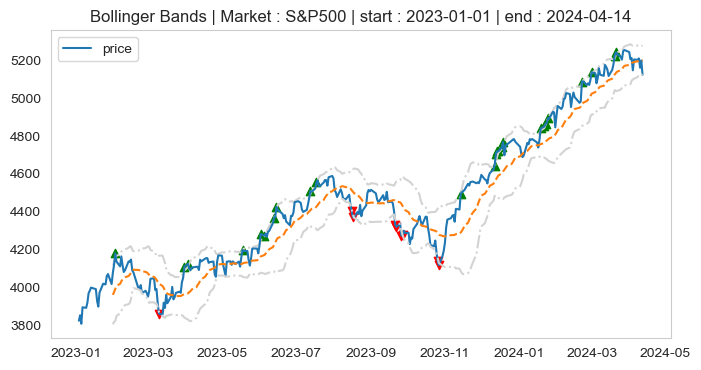

In [25]:
plt.figure(figsize = (8, 4))
plt.plot(hband, color = 'lightgray', ls = '-.')
plt.scatter(
    hband_indicator[hband_indicator == 1].index,
    data['Close'].loc[hband_indicator[hband_indicator == 1].index],
    color = 'green',
    marker = '^'
)
plt.plot(data['Close'], label = 'price')
plt.plot(mavg, ls = '--')
plt.plot(lband, color = 'lightgray', ls = '-.')
plt.scatter(
    lband_indicator[lband_indicator == 1].index,
    data['Close'].loc[lband_indicator[lband_indicator == 1].index],
    color = 'red',
    marker = 'v'
)
plt.legend()
plt.grid(False)
plt.title(f'Bollinger Bands | Market : S&P500 | start : {start_date} | end : {end_date}')
plt.show()

### percentage band, width band

pband는 현재 종가가 Bollinger Bands 내에서 어디에 위치하는지를 나타내는 지표다. 이 값은 현재 가격이 밴드의 어느 위치에 있는지를 백분율로 표현하여, 상대적인 가격 위치를 보여준다. 계산 방법은 다음과 같다.

$$\mbox{p band} = \frac{p_t - \mbox{lower band}}{\mbox{upper band} - \mbox{lower band}}$$

이 공식에서, 현재 종가가 하단 밴드보다 아래에 있으면 %b는 0보다 작아지고, 상단 밴드보다 위에 있으면 %b는 1보다 커진다. %b가 0.5인 경우는 가격이 밴드의 중간점에 위치함을 의미한다.

반면, wband는 상단 밴드와 하단 밴드 사이의 거리를 나타내는 지표로, 시장의 변동성을 측정한다. 밴드 폭이 넓어질수록 변동성이 크다는 것을 나타내며, 밴드 폭이 좁아질수록 변동성이 낮다는 것을 의미한다. 계산 방법은 다음과 같다

$$\mbox{w band} = \frac{\mbox{upper band - lower band}}{\mbox{biddle band}}$$

밴드 폭은 퍼센트로 표현되며, 이 값이 커짐에 따라 시장의 변동성이 증가하고 있음을 나타낸다. 반대로, 값이 작아지면 시장의 변동성이 감소하고 있음을 나타낸다. 이 지표는 특히 시장의 과매수 또는 과매도 상태를 파악하는 데 유용하게 사용될 수 있다.

In [26]:
pband = bollinger_pband(
    close = data['Close'],
    window = 20,
    window_dev = 2,
    fillna = False
)

wband = bollinger_wband(
    close = data['Close'],
    window = 20,
    window_dev = 2,
    fillna = False
)

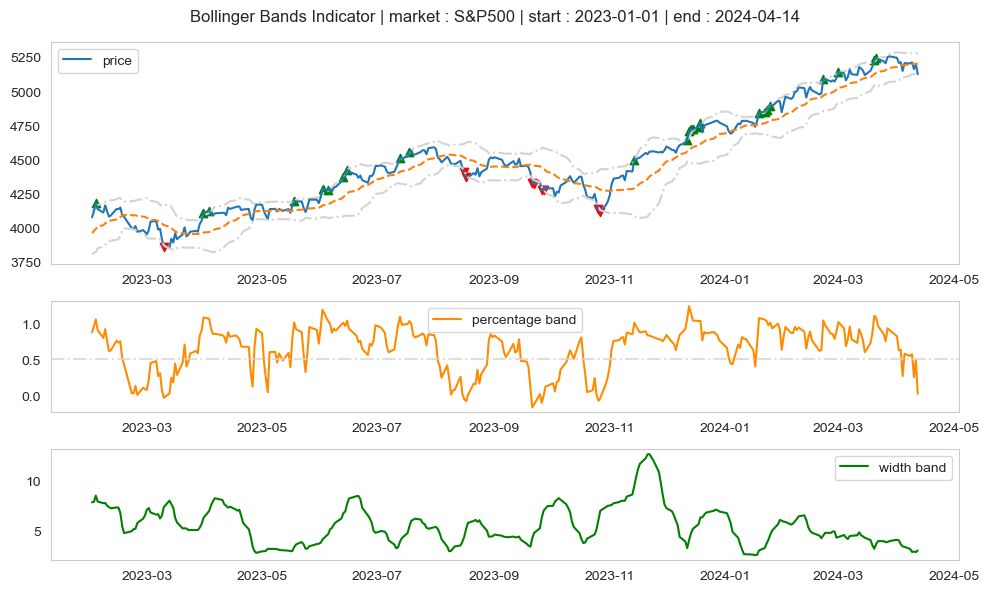

In [33]:
import matplotlib.gridspec as gridspec

plt.figure(figsize = (10, 6))
plt.subplot(3, 1, 1)
gs = gridspec.GridSpec(3, 1, height_ratios=[2, 1, 1]) 

plt.subplot(gs[0])
plt.plot(hband, color = 'lightgray', ls = '-.')
plt.scatter(
    hband_indicator[hband_indicator == 1].index,
    data['Close'].loc[hband_indicator[hband_indicator == 1].index],
    color = 'green',
    marker = '^'
)
plt.plot(data['Close'][19:], label = 'price')
plt.plot(mavg, ls = '--')
plt.plot(lband, color = 'lightgray', ls = '-.')
plt.scatter(
    lband_indicator[lband_indicator == 1].index,
    data['Close'].loc[lband_indicator[lband_indicator == 1].index],
    color = 'red',
    marker = 'v'
)
plt.legend()
plt.grid(False)

plt.subplot(gs[1])
plt.plot(pband, color = 'darkorange')
plt.grid(False)
plt.axhline(y = 0.5, color = 'lightgray', linestyle = '-.', alpha = 0.75)
plt.legend(['percentage band'])

plt.subplot(gs[2])
plt.plot(wband, color = 'green')
plt.grid(False)
plt.legend(['width band'])

plt.suptitle(f'Bollinger Bands Indicator | market : S&P500 | start : {start_date} | end : {end_date}')
plt.tight_layout()
plt.show()